In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [197]:
#读取数据
data = np.genfromtxt('../01-numpy/ex1data1.txt',delimiter=',',dtype='float')
data[0:10]

X = data[:,0:-1]  # X 为前n-1列  数据
y = data[:,-1]


m = len(y)   # 样本数量
y = y.reshape(m,1)

In [198]:
# 特征归一化
def featureNormaliza(X):
    X_norm = np.array(X)
    mu = np.zeros((1,X.shape[1]))
    sigma = np.zeros((1,X.shape[1]))
    
    mu = np.mean(X_norm,0)   # 求每一列的平均值
    sigma = np.std(X_norm,0)  #每一列的标准差
    
    for i in range(X.shape[1]):
        X_norm[:,i] = (X_norm[:,i] - mu[i])/sigma[i]
    return X_norm,mu,sigma



In [199]:
def plot_X1_X2(X):
    plt.scatter(X[:,0],X[:,1])
    plt.show()

In [200]:
def computerCost(X,y,theta):
    m = len(y)
    J = 0
    J = (np.transpose(X*theta-y))*(X*theta-y)/(2*m)
    return J

In [205]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m = len(y)
    n = len(theta)
    
    temp = np.matrix(np.zeros((n,num_iters)))
    J_history = np.zeros((num_iters,1))
    
    for i in range(num_iters):
        h = np.dot(X,theta)  # 內积
        diff = h - y  # 误差
        temp[:,i] = theta - ((alpha/m)*(np.dot(X.T,h-y)))
#         temp[:,i] = theta - (alpha/m) * X.T.dot(diff)  # 计算梯度
        theta = temp[:,i]
        J_history[i] = computerCost(X,y,theta)
        
        print('.....'+str(i))
    return theta,J_history
    

In [206]:
def plotJ(J_history,num_iters):
    x = np.arange(1,num_iters+1)
    plt.plot(x,J_history)
    plt.xlabel('num_iters')
    plt.ylabel('J')
    plt.show()

In [207]:
def linearRegression(X,y,alpha=0.01,num_iters=400):
    X,mu,sigma = featureNormaliza(X)
    plot_X1_X2(X)
    
    X=np.hstack((np.ones((m,1)),X))  # 增加1列
    print('执行梯度下降....')
    theta = np.zeros((X.shape[1],1))
    
    theta,J_history = gradientDescent(X,y,theta,alpha,num_iters)
    plotJ(J_history,num_iters)
    
    return mu,sigma,theta

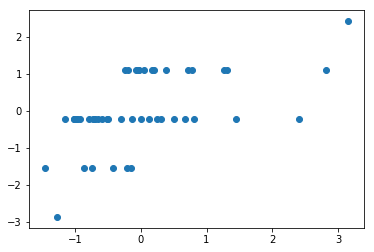

执行梯度下降....
.....0
.....1
.....2
.....3
.....4
.....5
.....6
.....7
.....8
.....9
.....10
.....11
.....12
.....13
.....14
.....15
.....16
.....17
.....18
.....19
.....20
.....21
.....22
.....23
.....24
.....25
.....26
.....27
.....28
.....29
.....30
.....31
.....32
.....33
.....34
.....35
.....36
.....37
.....38
.....39
.....40
.....41
.....42
.....43
.....44
.....45
.....46
.....47
.....48
.....49
.....50
.....51
.....52
.....53
.....54
.....55
.....56
.....57
.....58
.....59
.....60
.....61
.....62
.....63
.....64
.....65
.....66
.....67
.....68
.....69
.....70
.....71
.....72
.....73
.....74
.....75
.....76
.....77
.....78
.....79
.....80
.....81
.....82
.....83
.....84
.....85
.....86
.....87
.....88
.....89
.....90
.....91
.....92
.....93
.....94
.....95
.....96
.....97
.....98
.....99
.....100
.....101
.....102
.....103
.....104
.....105
.....106
.....107
.....108
.....109
.....110
.....111
.....112
.....113
.....114
.....115
.....116
.....117
.....118
.....119
.....120
.....121
.

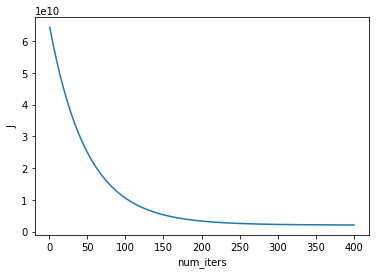

(array([2000.68085106,    3.17021277]),
 array([7.86202619e+02, 7.52842809e-01]),
 matrix([[334302.06399328],
         [ 99411.44947359],
         [  3267.01285407]]))

In [208]:
linearRegression(X,y)

